## Visualize Data from reliance.csv


In [2]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt


In [3]:
% matplotlib inline

In [4]:
import os
print(os.getcwd())
os.chdir('C:\\Users\\G560667\\stock-trader\\')
print(os.getcwd())

\\inmbfp1\redirect1\G560667\My Documents
C:\Users\G560667\stock-trader


In [5]:
dataset = read_csv('reliance.csv', header=0, index_col=0)

In [6]:
values = dataset.values

In [7]:
type(values)

numpy.ndarray

In [8]:
df=pd.DataFrame(dataset)

In [10]:
df.tail()

,Prev Close,Open,High,Close,Low
Date,,,,,
2018-01-02,909.75,913.00,919.55,911.15,906.40
2018-01-03,911.15,925.00,926.00,914.80,913.05
2018-01-04,914.80,918.15,921.80,920.30,915.70
2018-01-05,920.30,921.80,926.90,923.25,920.25
2018-01-08,923.25,926.10,931.00,928.55,923.50


In [11]:
columns = ['Prev Close', 'Open','High' ,'Close','Low']

In [12]:
npdataset = read_csv('reliance.csv', header=0, index_col=0)
values = dataset.values
groups=[1,2,3,4]

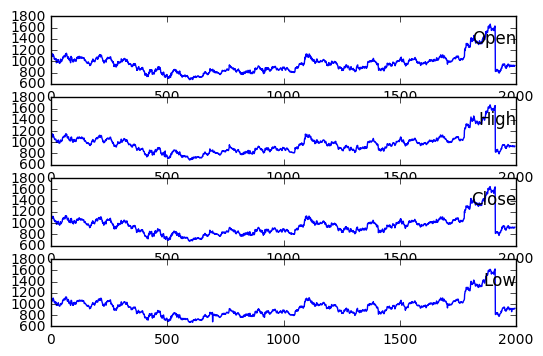

In [14]:
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:,group])
    plt.title(npdataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [15]:
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [16]:
# ensure all data is float
values.astype('float32')

array([[ 1090.55004883,  1091.09997559,  1091.09997559,  1075.5       ,
         1021.84997559],
       [ 1075.5       ,  1149.90002441,  1149.90002441,  1070.69995117,
         1065.40002441],
       [ 1070.69995117,  1079.90002441,  1094.5       ,  1088.        ,
         1070.65002441],
       ..., 
       [  914.79998779,   918.15002441,   921.79998779,   920.29998779,
          915.70001221],
       [  920.29998779,   921.79998779,   926.90002441,   923.25      ,
          920.25      ],
       [  923.25      ,   926.09997559,   931.        ,   928.54998779,
          923.5       ]], dtype=float32)

In [17]:
# normalize features
from sklearn import preprocessing

In [18]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [22]:
scaled = scaler.fit_transform(values)

In [23]:
type(scaled)

numpy.ndarray

In [24]:
scaled

array([[ 0.42551335,  0.42115385,  0.41574178,  0.4100616 ,  0.36725454],
       [ 0.4100616 ,  0.48066802,  0.47561348,  0.40513347,  0.41310871],
       [ 0.40513347,  0.40981781,  0.41920375,  0.42289528,  0.41863648],
       ..., 
       [ 0.24507187,  0.24610324,  0.24335607,  0.25071869,  0.25548829],
       [ 0.25071869,  0.24979757,  0.24854903,  0.25374743,  0.26027902],
       [ 0.25374743,  0.2541498 ,  0.25272376,  0.25918891,  0.26370097]])

In [25]:
reframed = series_to_supervised(scaled, 1, 1)

In [26]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.425513,0.421154,0.415742,0.410062,0.367255,0.410062,0.480668,0.475613,0.405133,0.413109
2,0.410062,0.480668,0.475613,0.405133,0.413109,0.405133,0.409818,0.419204,0.422895,0.418636
3,0.405133,0.409818,0.419204,0.422895,0.418636,0.422895,0.418016,0.440077,0.441427,0.426375
4,0.422895,0.418016,0.440077,0.441427,0.426375,0.441427,0.438259,0.438856,0.438450,0.445328
5,0.441427,0.438259,0.438856,0.438450,0.445328,0.438450,0.465283,0.475410,0.416222,0.396894


## Train Test Split

In [27]:
values = reframed.values
n_train_hours = 1596
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1596, 1, 9) (1596,) (399, 1, 9) (399,)


## Fit model --Keras

In [ ]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()